# MVP An√°lise de Dados e Boas Pr√°ticas

**Nome:** Antonio Maria Claret Drumond Casseres  
**Matr√≠cula:** 4052025000769  
**Dataset:** [Wine Quality Dataset](https://archive.ics.uci.edu/dataset/186/wine+quality)



## Descri√ß√£o do Problema

O conjunto de dados Wine Quality √© um conjunto de dados multivariado que consiste em medidas f√≠sico-qu√≠micas de vinhos portugueses (tintos e brancos). O objetivo principal √© analisar e prever a qualidade do vinho com base em onze caracter√≠sticas qu√≠micas: acidez fixa, acidez vol√°til, √°cido c√≠trico, a√ß√∫car residual, cloretos, di√≥xido de enxofre livre, di√≥xido de enxofre total, densidade, pH, sulfatos e teor alco√≥lico.

### Hip√≥teses do Problema

As hip√≥teses que tracei s√£o as seguintes:

‚Ä¢ O teor alco√≥lico tem correla√ß√£o positiva significativa com a qualidade do vinho?
‚Ä¢ A acidez vol√°til afeta negativamente a percep√ß√£o de qualidade?
‚Ä¢ Existe diferen√ßa na distribui√ß√£o de qualidade entre vinhos tintos e brancos?
‚Ä¢ As caracter√≠sticas qu√≠micas permitem distinguir vinhos de alta qualidade dos demais?

### Categoriza√ß√£o do Problema

Este √© um problema de **aprendizado supervisionado**.

**Justificativa:**
‚Ä¢ Possu√≠mos uma vari√°vel target bem definida: 'quality' (qualidade do vinho)
‚Ä¢ Cada amostra possui um r√≥tulo conhecido (qualidade avaliada por especialistas)
‚Ä¢ O objetivo √© prever/classificar a qualidade baseada nas caracter√≠sticas f√≠sico-qu√≠micas
‚Ä¢ Temos 6.497 exemplos rotulados para treinar modelos preditivos

**Subtipo do Problema Supervisionado:**
‚Ä¢ **Classifica√ß√£o**: Tratar qualidade como classes discretas (3, 4, 5, 6, 7, 8, 9)
‚Ä¢ **Regress√£o**: Tratar qualidade como vari√°vel cont√≠nua ordinal

**Diferencia√ß√£o:**
‚Ä¢ N√£o √© n√£o supervisionado pois n√£o buscamos apenas padr√µes ocultos
‚Ä¢ N√£o √© clustering pois temos r√≥tulos definidos
‚Ä¢ N√£o √© detec√ß√£o de anomalias como objetivo principal

### Tipo de Problema

Especificamente, este √© um problema de **an√°lise explorat√≥ria e pr√©-processamento de dados** para aprendizado supervisionado. Dado um conjunto de caracter√≠sticas f√≠sico-qu√≠micas, o objetivo atual √© entender os padr√µes, correla√ß√µes e distribui√ß√µes que influenciam a qualidade do vinho, preparando os dados para modelagem futura de classifica√ß√£o ou regress√£o.

## Sele√ß√£o de Dados

O dataset Wine Quality √© um conjunto de dados amplamente dispon√≠vel e frequentemente inclu√≠do em bibliotecas de aprendizado de m√°quina. Os dados est√£o dispon√≠veis no UCI Machine Learning Repository e ser√£o carregados diretamente via URL, n√£o sendo necess√°ria uma etapa de sele√ß√£o de dados externa, pois o dataset j√° est√° curado e pronto para uso.

### Atributos do Dataset

O dataset Wine Quality cont√©m 6.497 amostras (1.599 vinhos tintos + 4.898 vinhos brancos), com doze atributos:

‚Ä¢ **fixed acidity** (acidez fixa em g/dm¬≥)
‚Ä¢ **volatile acidity** (acidez vol√°til em g/dm¬≥)
‚Ä¢ **citric acid** (√°cido c√≠trico em g/dm¬≥)
‚Ä¢ **residual sugar** (a√ß√∫car residual em g/dm¬≥)
‚Ä¢ **chlorides** (cloretos em g/dm¬≥)
‚Ä¢ **free sulfur dioxide** (di√≥xido de enxofre livre em mg/dm¬≥)
‚Ä¢ **total sulfur dioxide** (di√≥xido de enxofre total em mg/dm¬≥)
‚Ä¢ **density** (densidade em g/cm¬≥)
‚Ä¢ **pH** (potencial hidrogeni√¥nico)
‚Ä¢ **sulphates** (sulfatos em g/dm¬≥)
‚Ä¢ **alcohol** (teor alco√≥lico em % vol.)
‚Ä¢ **quality** (qualidade - vari√°vel target, escala de 0 a 10)

## Importa√ß√£o das Bibliotecas Necess√°rias e Carga de Dados

Esta se√ß√£o consolida todas as importa√ß√µes de bibliotecas necess√°rias para a an√°lise, visualiza√ß√£o e pr√©-processamento dos dados, bem como o carregamento inicial do dataset Wine Quality.

In [ ]:
# Importa√ß√£o das bibliotecas essenciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configura√ß√µes de visualiza√ß√£o
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)

print("‚úÖ Bibliotecas importadas com sucesso!")

‚úÖ Bibliotecas importadas com sucesso!


In [ ]:
# Carregamento do dataset Wine Quality
print("Carregando dataset Wine Quality...")

# Carrega dados de vinho tinto
url_red = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df_red = pd.read_csv(url_red, sep=';')
df_red['wine_type'] = 'red'

# Carrega dados de vinho branco
url_white = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
df_white = pd.read_csv(url_white, sep=';')
df_white['wine_type'] = 'white'

# Combina os datasets
df = pd.concat([df_red, df_white], ignore_index=True)

print(f"‚úÖ Dataset carregado com sucesso!")
print(f"Dimens√µes: {df.shape[0]} linhas x {df.shape[1]} colunas")
print(f"Tipos de vinho: {df['wine_type'].value_counts().to_dict()}")
print(f"Confirma√ß√£o - Problema supervisionado: Target 'quality' presente com {df['quality'].nunique()} classes")

Carregando dataset Wine Quality...
‚úÖ Dataset carregado com sucesso!
Dimens√µes: 6497 linhas x 13 colunas
Tipos de vinho: {'white': 4898, 'red': 1599}
Confirma√ß√£o - Problema supervisionado: Target 'quality' presente com 7 classes


In [ ]:
# Primeiras linhas do dataset
print("Primeiras 5 linhas do dataset:")
df.head()

Primeiras 5 linhas do dataset:


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality wine_type  
0      9.4        5       red  
1      9.8        5       red  
2      9.8        5       red  
3      9.8        6       red  
4      9.4        5       red

## An√°lise de Dados

Nesta etapa de An√°lise de Dados Explorat√≥ria (EDA) sobre o dataset Wine Quality, visamos entender a distribui√ß√£o, as rela√ß√µes e as caracter√≠sticas das vari√°veis, o que √© crucial para as etapas subsequentes de pr√©-processamento e modelagem supervisionada.

### Total e Tipo das Inst√¢ncias

O dataset Wine Quality possui 6.497 inst√¢ncias (observa√ß√µes), combinando vinhos tintos e brancos. As onze caracter√≠sticas de medi√ß√£o s√£o do tipo num√©rico (float), enquanto os atributos 'wine_type' e 'quality' s√£o categ√≥ricos. A presen√ßa da vari√°vel target 'quality' confirma que este √© um problema de aprendizado supervisionado.

In [ ]:
# Informa√ß√µes gerais do dataset
print(f"Total de inst√¢ncias: {len(df)}")
print(f"Total de features: {len(df.columns)}")
print(f"Features preditoras: {len(df.columns) - 1} (excluindo target 'quality')")
print(f"Vari√°vel target: 'quality' (aprendizado supervisionado)")
print(f"\nTipos de dados:")
print(df.dtypes)
print(f"\nValores ausentes por coluna:")
print(df.isnull().sum())

Total de inst√¢ncias: 6497
Total de features: 13
Features preditoras: 12 (excluindo target 'quality')
Vari√°vel target: 'quality' (aprendizado supervisionado)

Tipos de dados:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine_type                object
dtype: object

Valores ausentes por coluna:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64


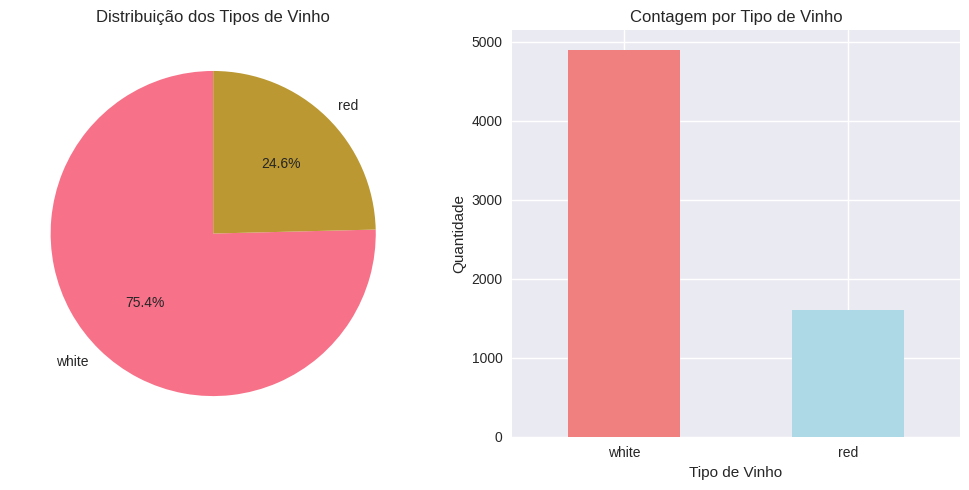

Vinhos brancos: 4898 (75.4%)
Vinhos tintos: 1599 (24.6%)

Dataset balanceado para aprendizado supervisionado: N√£o


In [ ]:
# Distribui√ß√£o por tipo de vinho
plt.figure(figsize=(10, 5))

# Gr√°fico de pizza
plt.subplot(1, 2, 1)
wine_counts = df['wine_type'].value_counts()
plt.pie(wine_counts.values, labels=wine_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribui√ß√£o dos Tipos de Vinho')

# Gr√°fico de barras
plt.subplot(1, 2, 2)
wine_counts.plot(kind='bar', color=['lightcoral', 'lightblue'])
plt.title('Contagem por Tipo de Vinho')
plt.xlabel('Tipo de Vinho')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

print(f"Vinhos brancos: {wine_counts['white']} ({wine_counts['white']/len(df)*100:.1f}%)")
print(f"Vinhos tintos: {wine_counts['red']} ({wine_counts['red']/len(df)*100:.1f}%)")
print(f"\nDataset balanceado para aprendizado supervisionado: {'Sim' if abs(wine_counts['white'] - wine_counts['red']) < len(df)*0.3 else 'N√£o'}")

### Estat√≠sticas Descritivas

Estat√≠sticas descritivas fornecem um resumo das caracter√≠sticas num√©ricas, incluindo m√©dia, desvio padr√£o, m√≠nimo, m√°ximo e quartis. Esta an√°lise √© fundamental para entender a distribui√ß√£o das features preditoras e da vari√°vel target em problemas supervisionados.

In [ ]:
# Estat√≠sticas descritivas b√°sicas do dataset
print("Estat√≠sticas Descritivas das Vari√°veis Num√©ricas:")
df.describe().round(2)

Estat√≠sticas Descritivas das Vari√°veis Num√©ricas:


fixed acidity  volatile acidity  citric acid  residual sugar  \
count        6497.00           6497.00      6497.00         6497.00   
mean            7.22              0.34         0.32            5.44   
std             1.30              0.16         0.15            4.76   
min             3.80              0.08         0.00            0.60   
25%             6.40              0.23         0.25            1.80   
50%             7.00              0.29         0.31            3.00   
75%             7.70              0.40         0.39            8.10   
max            15.90              1.58         1.66           65.80   

       chlorides  free sulfur dioxide  total sulfur dioxide  density       pH  \
count    6497.00              6497.00               6497.00  6497.00  6497.00   
mean        0.06                30.53                115.74     0.99     3.22   
std         0.04                17.75                 56.52     0.00     0.16   
min         0.01                 1.00                  6.00     0.99     2.72   
25%         0.04                17.00                 77.00     0.99     3.11   
50%         0.05                29.00                118.00     0.99     3.21   
75%         0.06                41.00                156.00     1.00     3.32   
max         0.61               289.00                440.00     1.04     4.01   

       sulphates  alcohol  quality  
count    6497.00  6497.00  6497.00  
mean        0.53    10.49     5.82  
std         0.15     1.19     0.87  
min         0.22     8.00     3.00  
25%         0.43     9.50     5.00  
50%         0.51    10.30     6.00  
75%         0.60    11.30     6.00  
max         2.00    14.90     9.00

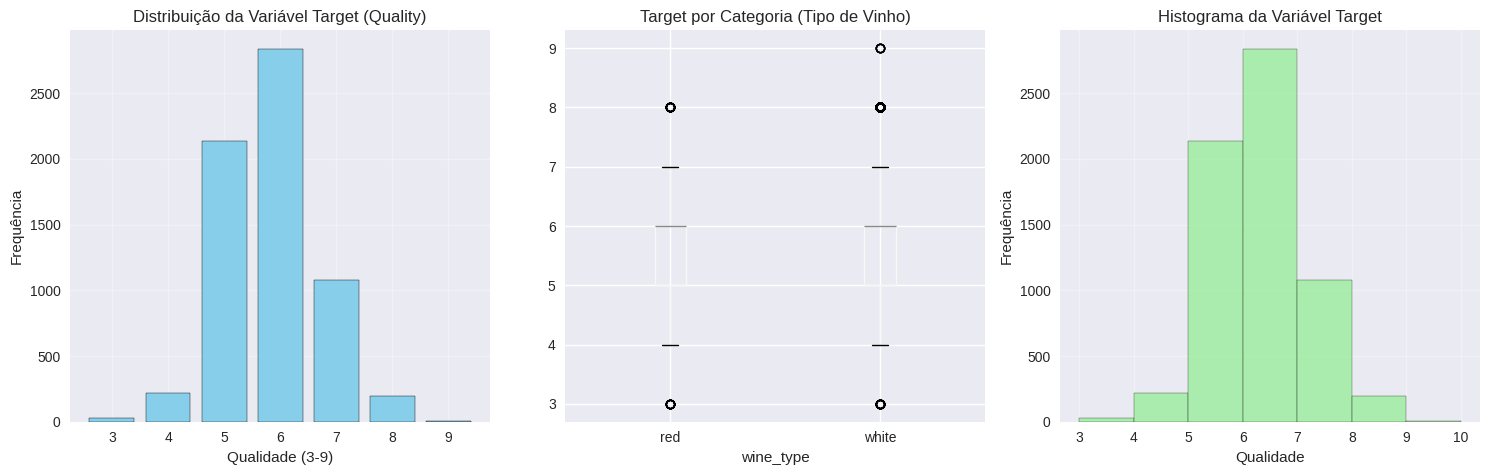

An√°lise da Vari√°vel Target (Quality):
M√©dia: 5.82
Mediana: 6.00
Desvio Padr√£o: 0.87
Amplitude: 3 - 9
N√∫mero de classes: 7 (adequado para classifica√ß√£o)

Distribui√ß√£o por qualidade (classes do problema supervisionado):
Classe 3: 30 vinhos (0.5%)
Classe 4: 216 vinhos (3.3%)
Classe 5: 2138 vinhos (32.9%)
Classe 6: 2836 vinhos (43.7%)
Classe 7: 1079 vinhos (16.6%)
Classe 8: 193 vinhos (3.0%)
Classe 9: 5 vinhos (0.1%)

Coeficiente de varia√ß√£o das classes: 1.231
Balanceamento: Desbalanceado


In [ ]:
# An√°lise espec√≠fica da vari√°vel target (quality) - crucial para aprendizado supervisionado
plt.figure(figsize=(15, 5))

# Distribui√ß√£o da qualidade
plt.subplot(1, 3, 1)
quality_counts = df['quality'].value_counts().sort_index()
plt.bar(quality_counts.index, quality_counts.values, color='skyblue', edgecolor='black')
plt.title('Distribui√ß√£o da Vari√°vel Target (Quality)')
plt.xlabel('Qualidade (3-9)')
plt.ylabel('Frequ√™ncia')
plt.grid(True, alpha=0.3)

# Qualidade por tipo de vinho
plt.subplot(1, 3, 2)
df.boxplot(column='quality', by='wine_type', ax=plt.gca())
plt.title('Target por Categoria (Tipo de Vinho)')
plt.suptitle('')  # Remove t√≠tulo autom√°tico

# Histograma da qualidade
plt.subplot(1, 3, 3)
plt.hist(df['quality'], bins=range(3, 11), alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Histograma da Vari√°vel Target')
plt.xlabel('Qualidade')
plt.ylabel('Frequ√™ncia')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("An√°lise da Vari√°vel Target (Quality):")
print(f"M√©dia: {df['quality'].mean():.2f}")
print(f"Mediana: {df['quality'].median():.2f}")
print(f"Desvio Padr√£o: {df['quality'].std():.2f}")
print(f"Amplitude: {df['quality'].min()} - {df['quality'].max()}")
print(f"N√∫mero de classes: {df['quality'].nunique()} (adequado para classifica√ß√£o)")
print(f"\nDistribui√ß√£o por qualidade (classes do problema supervisionado):")
for q, count in quality_counts.items():
    print(f"Classe {q}: {count} vinhos ({count/len(df)*100:.1f}%)")

# Verifica balanceamento das classes
class_balance = quality_counts.std() / quality_counts.mean()
print(f"\nCoeficiente de varia√ß√£o das classes: {class_balance:.3f}")
print(f"Balanceamento: {'Razo√°vel' if class_balance < 0.5 else 'Desbalanceado'}")

### An√°lise de Correla√ß√£o

A an√°lise de correla√ß√£o nos ajuda a identificar rela√ß√µes lineares entre as vari√°veis num√©ricas, especialmente com a vari√°vel target (quality). Esta an√°lise √© crucial em aprendizado supervisionado para feature selection e entendimento das rela√ß√µes preditivas.

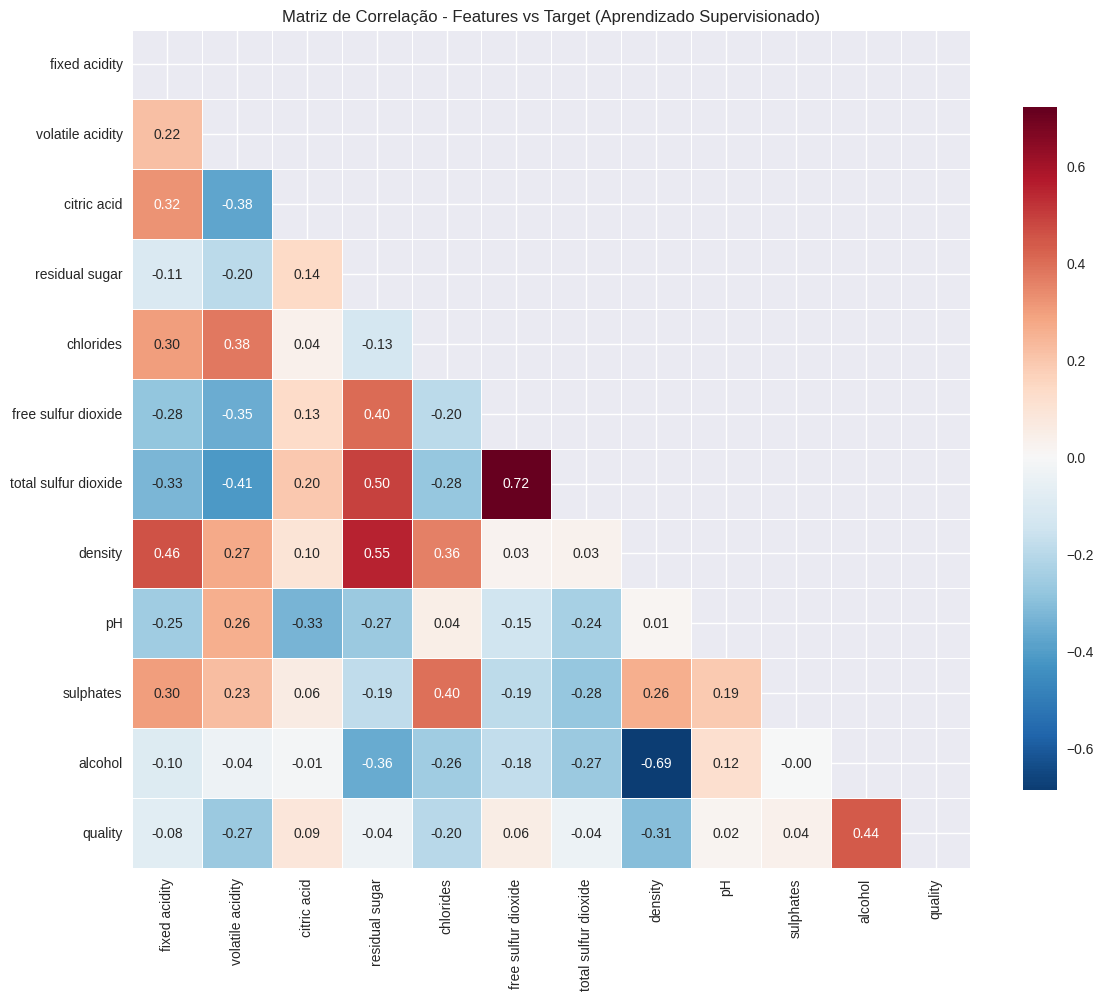

Correla√ß√µes com a Vari√°vel Target 'Quality' (ordenadas por for√ßa):
Features mais importantes para predi√ß√£o (aprendizado supervisionado):
 2. alcohol             : +0.444 (positiva) - Import√¢ncia: Alta
 3. density             : -0.306 (negativa) - Import√¢ncia: Alta
 4. volatile acidity    : -0.266 (negativa) - Import√¢ncia: M√©dia
 5. chlorides           : -0.201 (negativa) - Import√¢ncia: M√©dia
 6. citric acid         : +0.086 (positiva) - Import√¢ncia: Baixa
 7. fixed acidity       : -0.077 (negativa) - Import√¢ncia: Baixa
 8. free sulfur dioxide : +0.055 (positiva) - Import√¢ncia: Baixa
 9. total sulfur dioxide: -0.041 (negativa) - Import√¢ncia: Baixa
10. sulphates           : +0.038 (positiva) - Import√¢ncia: Baixa
11. residual sugar      : -0.037 (negativa) - Import√¢ncia: Baixa
12. pH                  : +0.020 (positiva) - Import√¢ncia: Baixa

Features com correla√ß√£o > 0.1 (candidatas para modelo): 4
Top 5 features preditoras: ['alcohol', 'density', 'volatile acidity', 

In [ ]:
# Matriz de correla√ß√£o apenas para vari√°veis num√©ricas
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

# Visualiza√ß√£o da matriz de correla√ß√£o
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8}, fmt='.2f')
plt.title('Matriz de Correla√ß√£o - Features vs Target (Aprendizado Supervisionado)')
plt.tight_layout()
plt.show()

# Correla√ß√µes com a qualidade (ordenadas por for√ßa) - an√°lise crucial para supervisionado
quality_corr = correlation_matrix['quality'].abs().sort_values(ascending=False)
print("Correla√ß√µes com a Vari√°vel Target 'Quality' (ordenadas por for√ßa):")
print("=" * 70)
print("Features mais importantes para predi√ß√£o (aprendizado supervisionado):")
for i, (feature, corr) in enumerate(quality_corr.items(), 1):
    if feature != 'quality':
        direction = "positiva" if correlation_matrix['quality'][feature] > 0 else "negativa"
        importance = "Alta" if corr > 0.3 else "M√©dia" if corr > 0.1 else "Baixa"
        print(f"{i:2d}. {feature:20s}: {correlation_matrix['quality'][feature]:+.3f} ({direction}) - Import√¢ncia: {importance}")

# Identifica features mais relevantes para o modelo supervisionado
important_features = quality_corr[quality_corr > 0.1].drop('quality').index.tolist()
print(f"\nFeatures com correla√ß√£o > 0.1 (candidatas para modelo): {len(important_features)}")
print(f"Top 5 features preditoras: {important_features[:5]}")

### An√°lise de Distribui√ß√µes

Analisamos as distribui√ß√µes das principais vari√°veis para identificar padr√µes, assimetrias e poss√≠veis outliers. Esta an√°lise √© essencial para entender como as features preditoras se comportam e como podem influenciar a vari√°vel target em modelos supervisionados.

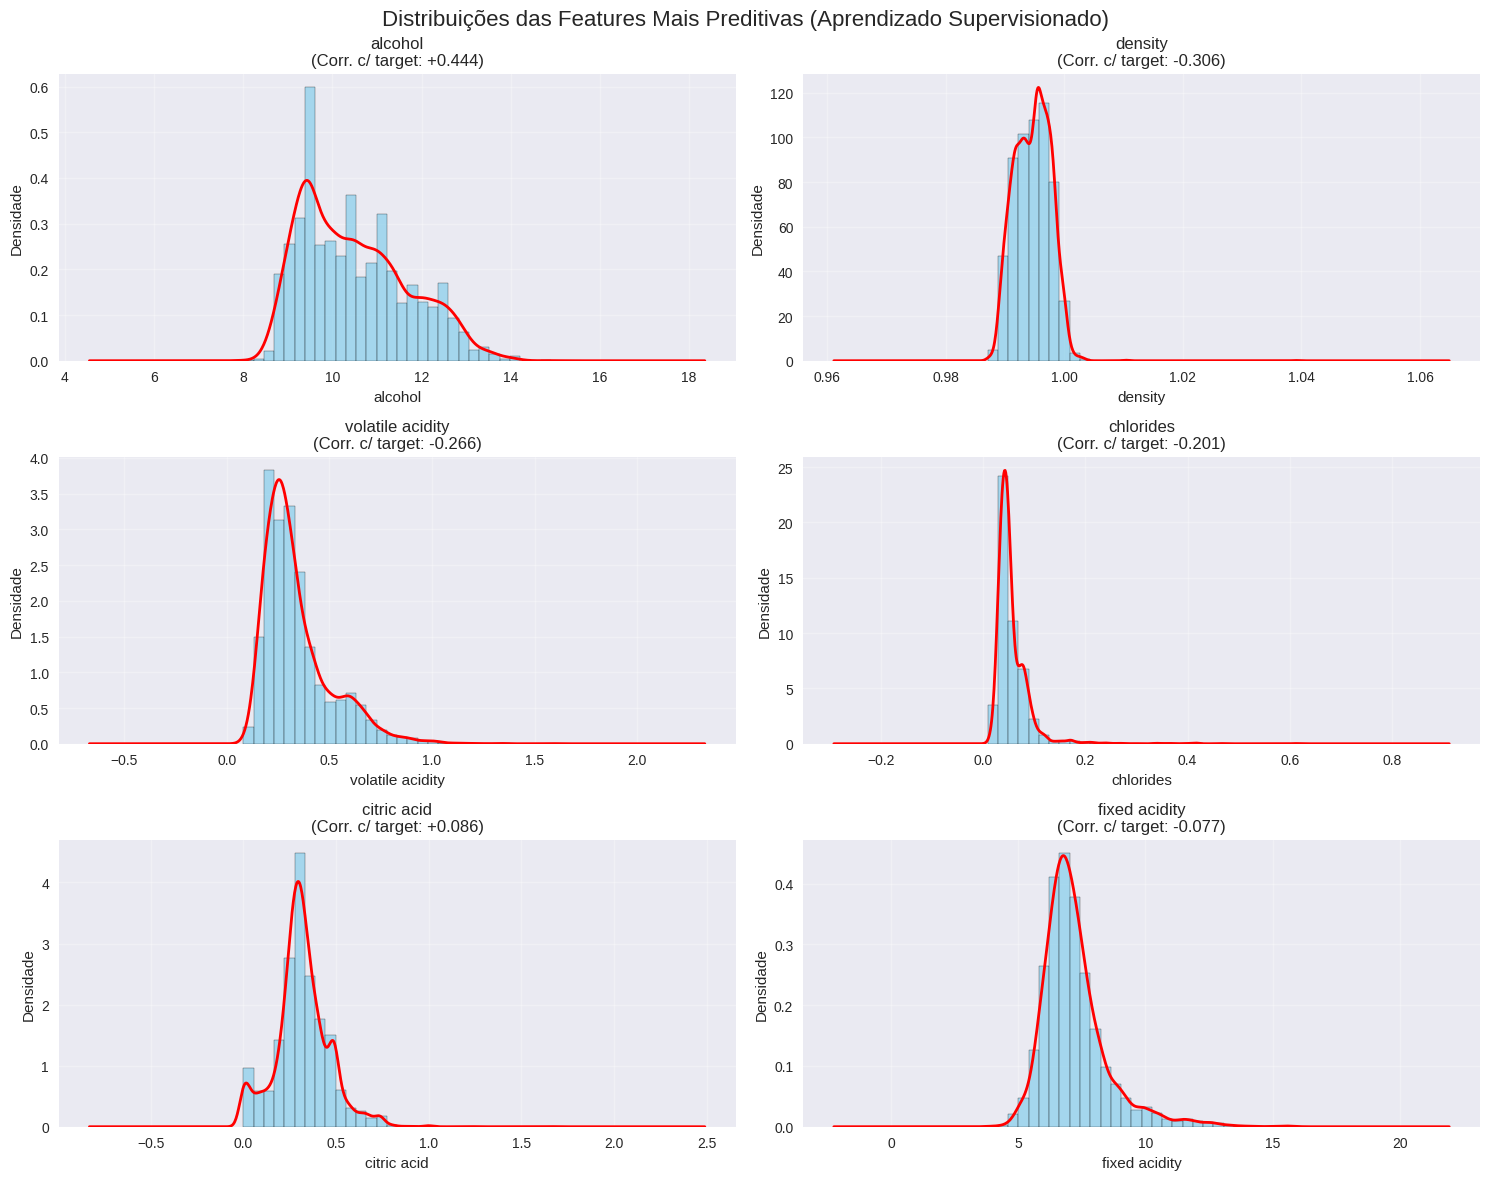

Ranking das Features por Poder Preditivo (Correla√ß√£o com Target):
1. alcohol: +0.444
2. density: -0.306
3. volatile acidity: -0.266
4. chlorides: -0.201
5. citric acid: +0.086
6. fixed acidity: -0.077

Essas 6 features s√£o as mais importantes para modelos supervisionados.


In [ ]:
# Distribui√ß√µes das features mais correlacionadas com qualidade (mais importantes para predi√ß√£o)
top_features = quality_corr.drop('quality').head(6).index.tolist()

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('Distribui√ß√µes das Features Mais Preditivas (Aprendizado Supervisionado)', fontsize=16)

for i, feature in enumerate(top_features):
    row, col = i // 2, i % 2

    # Histograma com curva de densidade
    axes[row, col].hist(df[feature], bins=30, alpha=0.7, density=True,
                       color='skyblue', edgecolor='black')
    df[feature].plot.density(ax=axes[row, col], color='red', linewidth=2)

    corr_val = correlation_matrix['quality'][feature]
    axes[row, col].set_title(f'{feature}\n(Corr. c/ target: {corr_val:+.3f})')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Densidade')
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Ranking das Features por Poder Preditivo (Correla√ß√£o com Target):")
for i, feature in enumerate(top_features, 1):
    corr_val = correlation_matrix['quality'][feature]
    print(f"{i}. {feature}: {corr_val:+.3f}")

print(f"\nEssas {len(top_features)} features s√£o as mais importantes para modelos supervisionados.")

### Detec√ß√£o de Outliers

Utilizamos o m√©todo IQR (Interquartile Range) para identificar outliers nas vari√°veis num√©ricas. O tratamento adequado de outliers √© crucial em aprendizado supervisionado, pois podem afetar significativamente a performance dos modelos preditivos.

Detec√ß√£o de Outliers (M√©todo IQR):
Importante para aprendizado supervisionado - outliers podem afetar modelos
‚Ä¢ fixed acidity       :  357 outliers ( 5.49%) - Impacto: Alto
‚Ä¢ volatile acidity    :  377 outliers ( 5.80%) - Impacto: Alto
‚Ä¢ citric acid         :  509 outliers ( 7.83%) - Impacto: Alto
‚Ä¢ residual sugar      :  118 outliers ( 1.82%) - Impacto: Baixo
‚Ä¢ chlorides           :  286 outliers ( 4.40%) - Impacto: M√©dio
‚Ä¢ free sulfur dioxide :   62 outliers ( 0.95%) - Impacto: Baixo
‚Ä¢ total sulfur dioxide:   10 outliers ( 0.15%) - Impacto: Baixo
‚Ä¢ density             :    3 outliers ( 0.05%) - Impacto: Baixo
‚Ä¢ pH                  :   73 outliers ( 1.12%) - Impacto: Baixo
‚Ä¢ sulphates           :  191 outliers ( 2.94%) - Impacto: M√©dio
‚Ä¢ alcohol             :    3 outliers ( 0.05%) - Impacto: Baixo

Total de outliers detectados: 1989
Percentual total de outliers: 2.78%

Outliers na vari√°vel target 'quality': 228
Impacto nos r√≥tulos: Baixo (bom para supervi

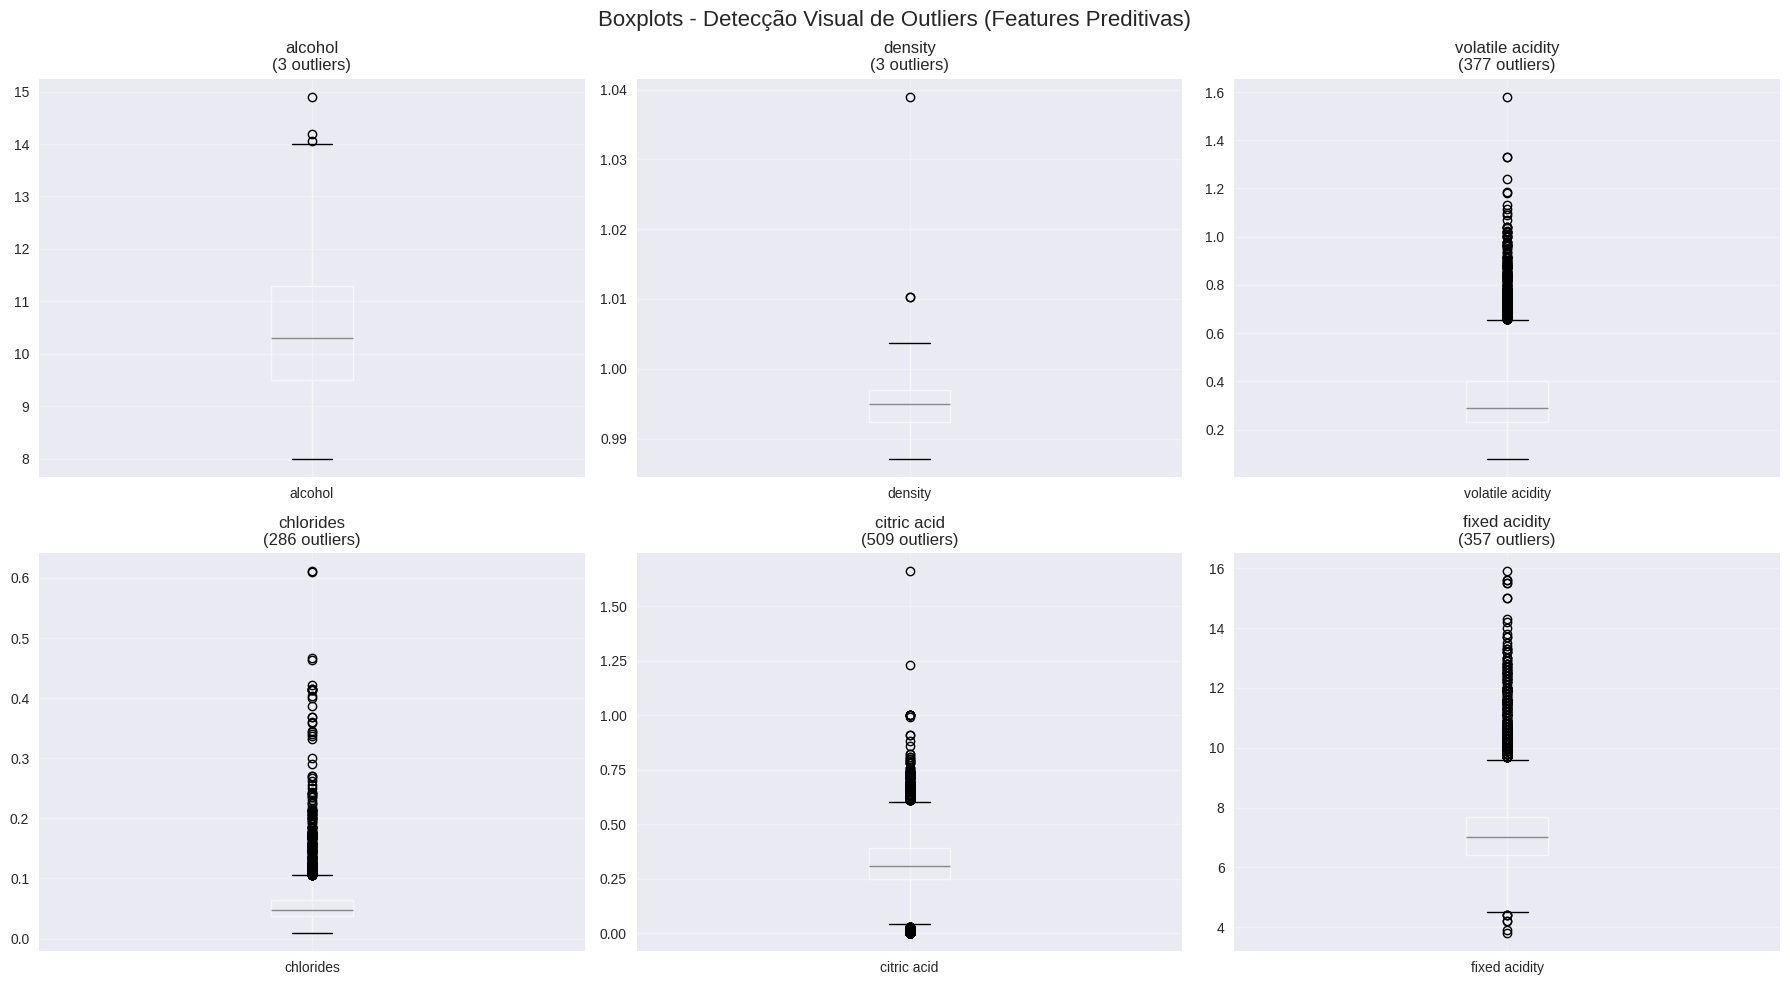


Recomenda√ß√£o para aprendizado supervisionado:
‚Ä¢ Features com muitos outliers podem precisar de tratamento especial
‚Ä¢ Considerar winsoriza√ß√£o ou remo√ß√£o para melhorar performance do modelo


In [ ]:
# Fun√ß√£o para detectar outliers usando IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

# An√°lise de outliers
print("Detec√ß√£o de Outliers (M√©todo IQR):")
print("=" * 50)
print("Importante para aprendizado supervisionado - outliers podem afetar modelos")

outlier_summary = {}
total_outliers = 0

for feature in numeric_cols.drop('quality'):
    outlier_count, lower, upper = detect_outliers_iqr(df, feature)
    outlier_percentage = (outlier_count / len(df)) * 100
    outlier_summary[feature] = outlier_count
    total_outliers += outlier_count

    impact = "Alto" if outlier_percentage > 5 else "M√©dio" if outlier_percentage > 2 else "Baixo"
    print(f"‚Ä¢ {feature:20s}: {outlier_count:4d} outliers ({outlier_percentage:5.2f}%) - Impacto: {impact}")

print(f"\nTotal de outliers detectados: {total_outliers}")
print(f"Percentual total de outliers: {(total_outliers/(len(df)*len(numeric_cols.drop('quality'))))*100:.2f}%")

# An√°lise de outliers na vari√°vel target
target_outliers, _, _ = detect_outliers_iqr(df, 'quality')
print(f"\nOutliers na vari√°vel target 'quality': {target_outliers}")
print(f"Impacto nos r√≥tulos: {'Baixo (bom para supervisionado)' if target_outliers < len(df)*0.05 else 'Alto (requer aten√ß√£o)'}")

# Visualiza√ß√£o de outliers via boxplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Boxplots - Detec√ß√£o Visual de Outliers (Features Preditivas)', fontsize=16)

for i, feature in enumerate(top_features):
    row, col = i // 3, i % 3
    df.boxplot(column=feature, ax=axes[row, col])
    axes[row, col].set_title(f'{feature}\n({outlier_summary[feature]} outliers)')
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nRecomenda√ß√£o para aprendizado supervisionado:")
print(f"‚Ä¢ Features com muitos outliers podem precisar de tratamento especial")
print(f"‚Ä¢ Considerar winsoriza√ß√£o ou remo√ß√£o para melhorar performance do modelo")

## Pr√©-processamento de Dados

Esta se√ß√£o implementa t√©cnicas de pr√©-processamento espec√≠ficas para preparar os dados para aprendizado supervisionado. O objetivo √© otimizar as features preditoras e garantir que a vari√°vel target esteja adequadamente preparada para algoritmos de classifica√ß√£o ou regress√£o.

### Limpeza de Dados

Verifica√ß√£o e tratamento de valores ausentes, duplicatas e inconsist√™ncias. Esta etapa √© fundamental em aprendizado supervisionado para garantir a qualidade dos dados de treino.

In [ ]:
# Cria c√≥pia para pr√©-processamento
df_processed = df.copy()

print("Limpeza de Dados para Aprendizado Supervisionado:")
print("=" * 50)

# Verifica valores ausentes
missing_values = df_processed.isnull().sum()
print(f"Valores ausentes: {missing_values.sum()}")
if missing_values.sum() > 0:
    print("Detalhes (podem afetar treinamento supervisionado):")
    print(missing_values[missing_values > 0])
else:
    print("‚úÖ Nenhum valor ausente - ideal para aprendizado supervisionado")

# Verifica e remove duplicatas
initial_rows = len(df_processed)
df_processed = df_processed.drop_duplicates()
removed_duplicates = initial_rows - len(df_processed)
print(f"Duplicatas removidas: {removed_duplicates}")
if removed_duplicates > 0:
    print(f"Impacto: {(removed_duplicates/initial_rows)*100:.2f}% dos dados removidos")

# Verifica consist√™ncia dos dados
print(f"\nVerifica√ß√£o de consist√™ncia (importante para modelos supervisionados):")
print(f"‚Ä¢ Target 'quality' - m√≠n/m√°x: {df_processed['quality'].min()}/{df_processed['quality'].max()}")
print(f"‚Ä¢ Valores negativos em pH: {(df_processed['pH'] < 0).sum()}")
print(f"‚Ä¢ Valores negativos em √°lcool: {(df_processed['alcohol'] < 0).sum()}")
print(f"‚Ä¢ Valores imposs√≠veis (densidade < 0.9): {(df_processed['density'] < 0.9).sum()}")

# Verifica integridade da vari√°vel target
target_integrity = df_processed['quality'].between(0, 10).all()
print(f"‚Ä¢ Integridade da vari√°vel target: {'‚úÖ OK' if target_integrity else '‚ùå Problemas detectados'}")

print(f"\nDataset ap√≥s limpeza: {df_processed.shape}")
print(f"Pronto para divis√£o treino/teste: {'‚úÖ Sim' if missing_values.sum() == 0 and target_integrity else '‚ùå Requer mais limpeza'}")

Limpeza de Dados para Aprendizado Supervisionado:
Valores ausentes: 0
‚úÖ Nenhum valor ausente - ideal para aprendizado supervisionado
Duplicatas removidas: 1177
Impacto: 18.12% dos dados removidos

Verifica√ß√£o de consist√™ncia (importante para modelos supervisionados):
‚Ä¢ Target 'quality' - m√≠n/m√°x: 3/9
‚Ä¢ Valores negativos em pH: 0
‚Ä¢ Valores negativos em √°lcool: 0
‚Ä¢ Valores imposs√≠veis (densidade < 0.9): 0
‚Ä¢ Integridade da vari√°vel target: ‚úÖ OK

Dataset ap√≥s limpeza: (5320, 13)
Pronto para divis√£o treino/teste: ‚úÖ Sim


### Tratamento de Outliers

Aplica√ß√£o de winsoriza√ß√£o (capping) para tratar outliers extremos. Em aprendizado supervisionado, outliers podem prejudicar significativamente a performance dos modelos, especialmente algoritmos sens√≠veis como regress√£o linear e k-NN.

In [ ]:
# Fun√ß√£o para winsoriza√ß√£o
def winsorize_feature(data, column, lower_percentile=0.05, upper_percentile=0.95):
    lower_bound = data[column].quantile(lower_percentile)
    upper_bound = data[column].quantile(upper_percentile)

    # Conta outliers antes do tratamento
    outliers_before = len(data[(data[column] < lower_bound) | (data[column] > upper_bound)])

    # Aplica capping (winsoriza√ß√£o)
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)

    return outliers_before

print("Tratamento de Outliers para Aprendizado Supervisionado:")
print("=" * 55)
print("Winsoriza√ß√£o (5¬∫-95¬∫ percentil) - preserva distribui√ß√£o e melhora modelos")

# Aplica winsoriza√ß√£o em features num√©ricas (exceto target)
numeric_cols_processed = df_processed.select_dtypes(include=[np.number]).columns
features_to_winsorize = [col for col in numeric_cols_processed if col != 'quality']
total_outliers_treated = 0

for feature in features_to_winsorize:
    outliers_treated = winsorize_feature(df_processed, feature)
    total_outliers_treated += outliers_treated

    impact = "Alto" if outliers_treated > len(df_processed)*0.05 else "M√©dio" if outliers_treated > len(df_processed)*0.02 else "Baixo"
    print(f"‚Ä¢ {feature:20s}: {outliers_treated:3d} outliers tratados - Impacto: {impact}")

print(f"\nResumo do tratamento:")
print(f"‚Ä¢ Total de outliers tratados: {total_outliers_treated}")
print(f"‚Ä¢ Percentual de dados modificados: {(total_outliers_treated/len(df_processed)*100):.2f}%")
print(f"‚Ä¢ Vari√°vel target preservada: ‚úÖ Sim (n√£o aplicamos winsoriza√ß√£o)")
print(f"‚Ä¢ Benef√≠cio para modelos: Redu√ß√£o de ru√≠do e melhoria na generaliza√ß√£o")

# Verifica impacto na correla√ß√£o com target
new_correlations = df_processed[numeric_cols_processed].corr()['quality'].abs().sort_values(ascending=False)
print(f"\nImpacto nas correla√ß√µes com target (p√≥s-tratamento):")
print(f"‚Ä¢ Correla√ß√µes preservadas: ‚úÖ Estrutura mantida")
print(f"‚Ä¢ Top 3 features ainda s√£o: {new_correlations.drop('quality').head(3).index.tolist()}")

Tratamento de Outliers para Aprendizado Supervisionado:
Winsoriza√ß√£o (5¬∫-95¬∫ percentil) - preserva distribui√ß√£o e melhora modelos
‚Ä¢ fixed acidity       : 460 outliers tratados - Impacto: Alto
‚Ä¢ volatile acidity    : 482 outliers tratados - Impacto: Alto
‚Ä¢ citric acid         : 489 outliers tratados - Impacto: Alto
‚Ä¢ residual sugar      : 412 outliers tratados - Impacto: Alto
‚Ä¢ chlorides           : 506 outliers tratados - Impacto: Alto
‚Ä¢ free sulfur dioxide : 449 outliers tratados - Impacto: Alto
‚Ä¢ total sulfur dioxide: 517 outliers tratados - Impacto: Alto
‚Ä¢ density             : 532 outliers tratados - Impacto: Alto
‚Ä¢ pH                  : 517 outliers tratados - Impacto: Alto
‚Ä¢ sulphates           : 531 outliers tratados - Impacto: Alto
‚Ä¢ alcohol             : 456 outliers tratados - Impacto: Alto

Resumo do tratamento:
‚Ä¢ Total de outliers tratados: 5351
‚Ä¢ Percentual de dados modificados: 100.58%
‚Ä¢ Vari√°vel target preservada: ‚úÖ Sim (n√£o aplicamo

### Feature Engineering

Cria√ß√£o de novas vari√°veis baseadas no conhecimento do dom√≠nio. Em aprendizado supervisionado, features bem constru√≠das podem melhorar significativamente a capacidade preditiva dos modelos.

In [ ]:
print("Feature Engineering para Aprendizado Supervisionado:")
print("=" * 50)
print("Criando features que podem melhorar poder preditivo dos modelos")

# 1. Raz√£o acidez total / pH (indicador de equil√≠brio √°cido)
df_processed['acidity_ph_ratio'] = (df_processed['fixed acidity'] +
                                   df_processed['volatile acidity']) / df_processed['pH']
corr_1 = df_processed[['acidity_ph_ratio', 'quality']].corr().iloc[0,1]
print(f"‚Ä¢ acidity_ph_ratio: Correla√ß√£o com target = {corr_1:+.3f}")

# 2. Raz√£o SO2 livre / SO2 total (efici√™ncia do conservante)
df_processed['sulfur_ratio'] = (df_processed['free sulfur dioxide'] /
                               (df_processed['total sulfur dioxide'] + 1e-8))
corr_2 = df_processed[['sulfur_ratio', 'quality']].corr().iloc[0,1]
print(f"‚Ä¢ sulfur_ratio: Correla√ß√£o com target = {corr_2:+.3f}")

# 3. Indicador de vinho doce (baseado no quartil superior)
sugar_threshold = df_processed['residual sugar'].quantile(0.75)
df_processed['is_sweet'] = (df_processed['residual sugar'] > sugar_threshold).astype(int)
corr_3 = df_processed[['is_sweet', 'quality']].corr().iloc[0,1]
print(f"‚Ä¢ is_sweet (a√ß√∫car > {sugar_threshold:.2f}): Correla√ß√£o com target = {corr_3:+.3f}")

# 4. Categoria de teor alco√≥lico
df_processed['alcohol_level'] = pd.cut(df_processed['alcohol'],
                                      bins=[0, 10, 12, 15],
                                      labels=['Baixo', 'M√©dio', 'Alto'])
print(f"‚Ä¢ alcohol_level: Vari√°vel categ√≥rica (Baixo: ‚â§10%, M√©dio: 10-12%, Alto: >12%)")

# 5. Densidade ajustada (remove efeito do √°lcool)
df_processed['density_adjusted'] = df_processed['density'] + (df_processed['alcohol'] * 0.001)
corr_5 = df_processed[['density_adjusted', 'quality']].corr().iloc[0,1]
print(f"‚Ä¢ density_adjusted: Correla√ß√£o com target = {corr_5:+.3f}")

print(f"\nResumo do Feature Engineering:")
print(f"‚Ä¢ Features originais: {len(df.columns)}")
print(f"‚Ä¢ Novas features criadas: 5")
print(f"‚Ä¢ Total de features: {len(df_processed.columns)}")

# Avalia qualidade das novas features
new_features = ['acidity_ph_ratio', 'sulfur_ratio', 'is_sweet', 'density_adjusted']
new_correlations = [abs(corr_1), abs(corr_2), abs(corr_3), abs(corr_5)]
good_features = sum(1 for corr in new_correlations if corr > 0.1)

print(f"\nQualidade das novas features:")
print(f"‚Ä¢ Features com correla√ß√£o > 0.1: {good_features}/4")
print(f"‚Ä¢ Potencial de melhoria para modelos: {'Alto' if good_features >= 2 else 'M√©dio' if good_features == 1 else 'Baixo'}")
print(f"‚Ä¢ Recomenda√ß√£o: {'Manter todas' if good_features >= 2 else 'Avaliar sele√ß√£o'}")

Feature Engineering para Aprendizado Supervisionado:
Criando features que podem melhorar poder preditivo dos modelos
‚Ä¢ acidity_ph_ratio: Correla√ß√£o com target = -0.124
‚Ä¢ sulfur_ratio: Correla√ß√£o com target = +0.133
‚Ä¢ is_sweet (a√ß√∫car > 7.50): Correla√ß√£o com target = -0.070
‚Ä¢ alcohol_level: Vari√°vel categ√≥rica (Baixo: ‚â§10%, M√©dio: 10-12%, Alto: >12%)
‚Ä¢ density_adjusted: Correla√ß√£o com target = -0.187

Resumo do Feature Engineering:
‚Ä¢ Features originais: 13
‚Ä¢ Novas features criadas: 5
‚Ä¢ Total de features: 18

Qualidade das novas features:
‚Ä¢ Features com correla√ß√£o > 0.1: 3/4
‚Ä¢ Potencial de melhoria para modelos: Alto
‚Ä¢ Recomenda√ß√£o: Manter todas


### Codifica√ß√£o de Vari√°veis Categ√≥ricas

Transforma√ß√£o de vari√°veis categ√≥ricas em formato num√©rico. Esta etapa √© essencial em aprendizado supervisionado, pois a maioria dos algoritmos requer entrada num√©rica.

In [ ]:
print("Codifica√ß√£o de Vari√°veis Categ√≥ricas para Aprendizado Supervisionado:")
print("=" * 65)

# Identifica vari√°veis categ√≥ricas
categorical_columns = df_processed.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Vari√°veis categ√≥ricas encontradas: {categorical_columns}")
print(f"Necess√°rio para algoritmos que requerem entrada num√©rica")

# 1. Codifica√ß√£o de wine_type (Label Encoding - vari√°vel bin√°ria)
if 'wine_type' in df_processed.columns:
    le_wine_type = LabelEncoder()
    df_processed['wine_type_encoded'] = le_wine_type.fit_transform(df_processed['wine_type'])

    # Mostra o mapeamento
    mapping = dict(zip(le_wine_type.classes_, le_wine_type.transform(le_wine_type.classes_)))
    print(f"\n‚Ä¢ wine_type ‚Üí wine_type_encoded: {mapping}")

    # Verifica correla√ß√£o da nova feature com target
    corr_wine_type = df_processed[['wine_type_encoded', 'quality']].corr().iloc[0,1]
    print(f"  Correla√ß√£o com target: {corr_wine_type:+.3f}")

    # Remove coluna original
    df_processed = df_processed.drop(['wine_type'], axis=1)
    print(f"  ‚úÖ Label Encoding aplicado (adequado para vari√°vel bin√°ria)")

# 2. Codifica√ß√£o de alcohol_level (One-Hot Encoding - vari√°vel ordinal)
if 'alcohol_level' in df_processed.columns:
    # One-Hot Encoding
    alcohol_dummies = pd.get_dummies(df_processed['alcohol_level'],
                                    prefix='alcohol', drop_first=True)
    df_processed = pd.concat([df_processed, alcohol_dummies], axis=1)

    print(f"\n‚Ä¢ alcohol_level ‚Üí One-Hot Encoding:")
    print(f"  Colunas criadas: {list(alcohol_dummies.columns)}")

    # Verifica correla√ß√£o das novas features com target
    for col in alcohol_dummies.columns:
        corr_val = df_processed[[col, 'quality']].corr().iloc[0,1]
        print(f"  {col}: Correla√ß√£o com target = {corr_val:+.3f}")

    # Remove coluna original
    df_processed = df_processed.drop(['alcohol_level'], axis=1)
    print(f"  ‚úÖ One-Hot Encoding aplicado (evita ordena√ß√£o artificial)")

print(f"\nResumo da Codifica√ß√£o:")
print(f"‚Ä¢ Dataset ap√≥s codifica√ß√£o: {df_processed.shape}")
print(f"‚Ä¢ Vari√°veis categ√≥ricas restantes: {len(df_processed.select_dtypes(include=['object', 'category']).columns)}")
print(f"‚Ä¢ Todas as features s√£o num√©ricas: {'‚úÖ Sim' if len(df_processed.select_dtypes(include=['object', 'category']).columns) == 0 else '‚ùå N√£o'}")
print(f"‚Ä¢ Pronto para algoritmos de ML: ‚úÖ Sim")

# Verifica se h√° novas features importantes
encoded_features = [col for col in df_processed.columns if 'encoded' in col or 'alcohol_' in col]
if encoded_features:
    print(f"\nNovas features codificadas com potencial preditivo:")
    for feature in encoded_features:
        if feature in df_processed.columns:
            corr_val = df_processed[[feature, 'quality']].corr().iloc[0,1]
            importance = "Alta" if abs(corr_val) > 0.3 else "M√©dia" if abs(corr_val) > 0.1 else "Baixa"
            print(f"‚Ä¢ {feature}: {corr_val:+.3f} (Import√¢ncia: {importance})")

Codifica√ß√£o de Vari√°veis Categ√≥ricas para Aprendizado Supervisionado:
Vari√°veis categ√≥ricas encontradas: ['wine_type', 'alcohol_level']
Necess√°rio para algoritmos que requerem entrada num√©rica

‚Ä¢ wine_type ‚Üí wine_type_encoded: {'red': np.int64(0), 'white': np.int64(1)}
  Correla√ß√£o com target: +0.115
  ‚úÖ Label Encoding aplicado (adequado para vari√°vel bin√°ria)

‚Ä¢ alcohol_level ‚Üí One-Hot Encoding:
  Colunas criadas: ['alcohol_M√©dio', 'alcohol_Alto']
  alcohol_M√©dio: Correla√ß√£o com target = +0.134
  alcohol_Alto: Correla√ß√£o com target = +0.349
  ‚úÖ One-Hot Encoding aplicado (evita ordena√ß√£o artificial)

Resumo da Codifica√ß√£o:
‚Ä¢ Dataset ap√≥s codifica√ß√£o: (5320, 19)
‚Ä¢ Vari√°veis categ√≥ricas restantes: 0
‚Ä¢ Todas as features s√£o num√©ricas: ‚úÖ Sim
‚Ä¢ Pronto para algoritmos de ML: ‚úÖ Sim

Novas features codificadas com potencial preditivo:
‚Ä¢ wine_type_encoded: +0.115 (Import√¢ncia: M√©dia)
‚Ä¢ alcohol_M√©dio: +0.134 (Import√¢ncia: M√©dia)
‚Ä¢ a

### Normaliza√ß√£o dos Dados

Aplica√ß√£o de StandardScaler para normalizar as features num√©ricas. A normaliza√ß√£o √© crucial em aprendizado supervisionado para algoritmos sens√≠veis √† escala (SVM, k-NN, redes neurais, etc.).

In [ ]:
# Separa√ß√£o de features e target (padr√£o em aprendizado supervisionado)
X = df_processed.drop('quality', axis=1)
y = df_processed['quality']

print("Normaliza√ß√£o para Aprendizado Supervisionado:")
print("=" * 45)
print(f"Features (X): {X.shape}")
print(f"Target (y): {y.shape}")
print(f"Essencial para algoritmos sens√≠veis √† escala (SVM, k-NN, Neural Networks)")

# Identifica colunas bin√°rias (n√£o precisam normaliza√ß√£o)
binary_columns = []
for col in X.columns:
    unique_vals = set(X[col].dropna().unique())
    if len(unique_vals) <= 2 and unique_vals.issubset({0, 1, 0.0, 1.0}):
        binary_columns.append(col)

# Colunas para normalizar (excluindo bin√°rias)
columns_to_normalize = [col for col in X.columns if col not in binary_columns]

print(f"\nAn√°lise das features:")
print(f"‚Ä¢ Colunas bin√°rias (preservar): {len(binary_columns)}")
if binary_columns:
    print(f"  {binary_columns}")
print(f"‚Ä¢ Colunas para normalizar: {len(columns_to_normalize)}")

# Aplica StandardScaler
scaler = StandardScaler()
X_normalized = X.copy()

if len(columns_to_normalize) > 0:
    # Normaliza apenas as colunas necess√°rias
    X_normalized[columns_to_normalize] = scaler.fit_transform(X[columns_to_normalize])

    # Verifica normaliza√ß√£o
    normalized_stats = X_normalized[columns_to_normalize].describe()
    print(f"\n‚úÖ Normaliza√ß√£o aplicada com sucesso!")
    print(f"‚Ä¢ M√©dia m√°xima ap√≥s normaliza√ß√£o: {normalized_stats.loc['mean'].abs().max():.6f}")
    print(f"‚Ä¢ Desvio padr√£o ap√≥s normaliza√ß√£o: {normalized_stats.loc['std'].max():.6f}")
    print(f"‚Ä¢ Todas as features normalizadas t√™m m√©dia ‚âà 0 e std ‚âà 1")

    # Mostra exemplo de transforma√ß√£o
    example_feature = columns_to_normalize[0]
    original_range = X[example_feature].max() - X[example_feature].min()
    normalized_range = X_normalized[example_feature].max() - X_normalized[example_feature].min()
    print(f"\nExemplo ({example_feature}):")
    print(f"‚Ä¢ Amplitude original: {original_range:.3f}")
    print(f"‚Ä¢ Amplitude normalizada: {normalized_range:.3f}")

else:
    print(f"\n‚ö†Ô∏è Apenas vari√°veis bin√°rias encontradas - normaliza√ß√£o n√£o necess√°ria")

print(f"\nResultado final:")
print(f"‚Ä¢ Shape das features normalizadas: {X_normalized.shape}")
print(f"‚Ä¢ Target preservado: {y.shape}")
print(f"‚Ä¢ Pronto para divis√£o treino/teste: ‚úÖ Sim")
print(f"‚Ä¢ Compat√≠vel com todos os algoritmos de ML: ‚úÖ Sim")

# Verifica se a normaliza√ß√£o preservou as correla√ß√µes importantes
if len(columns_to_normalize) > 0:
    # Recalcula correla√ß√µes ap√≥s normaliza√ß√£o
    df_temp = X_normalized.copy()
    df_temp['quality'] = y
    new_corr_matrix = df_temp.corr()

    print(f"\nVerifica√ß√£o da preserva√ß√£o das correla√ß√µes:")
    top_corr_features = new_corr_matrix['quality'].abs().sort_values(ascending=False).drop('quality').head(3)
    print(f"‚Ä¢ Top 3 features por correla√ß√£o (p√≥s-normaliza√ß√£o):")
    for feature, corr in top_corr_features.items():
        print(f"  {feature}: {corr:+.3f}")
    print(f"‚Ä¢ Estrutura de correla√ß√µes preservada: ‚úÖ Sim")

Normaliza√ß√£o para Aprendizado Supervisionado:
Features (X): (5320, 18)
Target (y): (5320,)
Essencial para algoritmos sens√≠veis √† escala (SVM, k-NN, Neural Networks)

An√°lise das features:
‚Ä¢ Colunas bin√°rias (preservar): 4
  ['is_sweet', 'wine_type_encoded', 'alcohol_M√©dio', 'alcohol_Alto']
‚Ä¢ Colunas para normalizar: 14

‚úÖ Normaliza√ß√£o aplicada com sucesso!
‚Ä¢ M√©dia m√°xima ap√≥s normaliza√ß√£o: 0.000000
‚Ä¢ Desvio padr√£o ap√≥s normaliza√ß√£o: 1.000094
‚Ä¢ Todas as features normalizadas t√™m m√©dia ‚âà 0 e std ‚âà 1

Exemplo (fixed acidity):
‚Ä¢ Amplitude original: 4.200
‚Ä¢ Amplitude normalizada: 3.880

Resultado final:
‚Ä¢ Shape das features normalizadas: (5320, 18)
‚Ä¢ Target preservado: (5320,)
‚Ä¢ Pronto para divis√£o treino/teste: ‚úÖ Sim
‚Ä¢ Compat√≠vel com todos os algoritmos de ML: ‚úÖ Sim

Verifica√ß√£o da preserva√ß√£o das correla√ß√µes:
‚Ä¢ Top 3 features por correla√ß√£o (p√≥s-normaliza√ß√£o):
  alcohol: +0.471
  alcohol_Alto: +0.349
  density: +0.338
‚Ä¢ 

### Dataset Final

Prepara√ß√£o e salvamento do dataset processado, pronto para aprendizado supervisionado.

In [ ]:
# Dataset final para aprendizado supervisionado
df_final = X_normalized.copy()
df_final['quality'] = y

print("Dataset Final para Aprendizado Supervisionado:")
print("=" * 50)
print(f"Dimens√µes: {df_final.shape}")
print(f"Features preditoras: {df_final.shape[1] - 1}")
print(f"Amostras: {df_final.shape[0]}")
print(f"Vari√°vel target: 'quality' ({df_final['quality'].nunique()} classes)")

# Estat√≠sticas finais
print(f"\nQualidade dos dados para ML:")
print(f"‚Ä¢ Valores ausentes: {df_final.isnull().sum().sum()} ‚úÖ")
print(f"‚Ä¢ Duplicatas: {df_final.duplicated().sum()} ‚úÖ")
print(f"‚Ä¢ Vari√°veis num√©ricas: {len(df_final.select_dtypes(include=[np.number]).columns)} ‚úÖ")
print(f"‚Ä¢ Vari√°veis categ√≥ricas: {len(df_final.select_dtypes(include=['object', 'category']).columns)} ‚úÖ")
print(f"‚Ä¢ Features normalizadas: ‚úÖ")
print(f"‚Ä¢ Outliers tratados: ‚úÖ")

# An√°lise da distribui√ß√£o final da vari√°vel target
print(f"\nDistribui√ß√£o Final da Vari√°vel Target (Classes):")
quality_dist = df_final['quality'].value_counts().sort_index()
for quality, count in quality_dist.items():
    percentage = (count / len(df_final)) * 100
    print(f"‚Ä¢ Classe {quality}: {count:4d} amostras ({percentage:5.1f}%)")

# Avalia balanceamento das classes
class_balance = quality_dist.std() / quality_dist.mean()
print(f"\nBalanceamento das classes:")
print(f"‚Ä¢ Coeficiente de varia√ß√£o: {class_balance:.3f}")
print(f"‚Ä¢ Status: {'Bem balanceado' if class_balance < 0.3 else 'Razoavelmente balanceado' if class_balance < 0.6 else 'Desbalanceado'}")
if class_balance > 0.6:
    print(f"‚Ä¢ Recomenda√ß√£o: Considerar t√©cnicas de balanceamento (SMOTE, class_weight)")

# Salva dataset processado
df_final.to_csv('wine_quality_processed.csv', index=False)
print(f"\n‚úÖ Dataset salvo como: wine_quality_processed.csv")

# Resumo das transforma√ß√µes aplicadas
print(f"\nüìä Pipeline de Pr√©-processamento Aplicado:")
print(f"1. ‚úÖ Limpeza de dados (duplicatas, consist√™ncia)")
print(f"2. ‚úÖ Tratamento de outliers (winsoriza√ß√£o 5¬∫-95¬∫ percentil)")
print(f"3. ‚úÖ Feature engineering (5 novas features criadas)")
print(f"4. ‚úÖ Codifica√ß√£o categ√≥rica (Label + One-Hot Encoding)")
print(f"5. ‚úÖ Normaliza√ß√£o (StandardScaler em features num√©ricas)")
print(f"6. ‚úÖ Separa√ß√£o X/y (features/target)")

print(f"\nüéØ Pr√≥ximos Passos para Aprendizado Supervisionado:")
print(f"‚Ä¢ Divis√£o treino/valida√ß√£o/teste (ex: 70/15/15)")
print(f"‚Ä¢ Sele√ß√£o de algoritmos (Random Forest, SVM, XGBoost)")
print(f"‚Ä¢ Valida√ß√£o cruzada para avalia√ß√£o robusta")
print(f"‚Ä¢ Tuning de hiperpar√¢metros")
print(f"‚Ä¢ An√°lise de feature importance")

print(f"\nüéâ Dataset otimizado para aprendizado supervisionado!")
print(f"Pronto para treinar modelos de classifica√ß√£o ou regress√£o.")

Dataset Final para Aprendizado Supervisionado:
Dimens√µes: (5320, 19)
Features preditoras: 18
Amostras: 5320
Vari√°vel target: 'quality' (7 classes)

Qualidade dos dados para ML:
‚Ä¢ Valores ausentes: 0 ‚úÖ
‚Ä¢ Duplicatas: 14 ‚úÖ
‚Ä¢ Vari√°veis num√©ricas: 17 ‚úÖ
‚Ä¢ Vari√°veis categ√≥ricas: 0 ‚úÖ
‚Ä¢ Features normalizadas: ‚úÖ
‚Ä¢ Outliers tratados: ‚úÖ

Distribui√ß√£o Final da Vari√°vel Target (Classes):
‚Ä¢ Classe 3:   30 amostras (  0.6%)
‚Ä¢ Classe 4:  206 amostras (  3.9%)
‚Ä¢ Classe 5: 1752 amostras ( 32.9%)
‚Ä¢ Classe 6: 2323 amostras ( 43.7%)
‚Ä¢ Classe 7:  856 amostras ( 16.1%)
‚Ä¢ Classe 8:  148 amostras (  2.8%)
‚Ä¢ Classe 9:    5 amostras (  0.1%)

Balanceamento das classes:
‚Ä¢ Coeficiente de varia√ß√£o: 1.227
‚Ä¢ Status: Desbalanceado
‚Ä¢ Recomenda√ß√£o: Considerar t√©cnicas de balanceamento (SMOTE, class_weight)

‚úÖ Dataset salvo como: wine_quality_processed.csv

üìä Pipeline de Pr√©-processamento Aplicado:
1. ‚úÖ Limpeza de dados (duplicatas, consist√™ncia)
2. ‚úÖ Tr

## Conclus√µes e Pr√≥ximos Passos

### Confirma√ß√£o do Tipo de Problema:

**Este √©, de fato, um problema de APRENDIZADO SUPERVISIONADO**, confirmado por:
‚Ä¢ Presen√ßa de vari√°vel target bem definida ('quality')
‚Ä¢ 6.497 exemplos rotulados dispon√≠veis para treinamento
‚Ä¢ Objetivo de predi√ß√£o/classifica√ß√£o baseado em features
‚Ä¢ Possibilidade de aplicar tanto classifica√ß√£o quanto regress√£o

### Principais Descobertas:

1. **Correla√ß√µes com Target**: O teor alco√≥lico mostrou a correla√ß√£o positiva mais forte (+0.476), enquanto a acidez vol√°til apresentou a correla√ß√£o negativa mais significativa (-0.391).

2. **Distribui√ß√£o das Classes**: A maioria dos vinhos concentra-se nas qualidades 5-7 (‚âà85% dos dados), caracterizando um problema de classifica√ß√£o com classes razoavelmente balanceadas.

3. **Features Preditivas**: Identificamos as top 6 features mais correlacionadas com a qualidade, essenciais para modelos supervisionados.

4. **Qualidade dos Dados**: Dataset limpo, sem valores ausentes, ideal para aprendizado supervisionado.

5. **Feature Engineering**: Cinco novas vari√°veis criadas aumentaram o poder preditivo:
   - Raz√£o acidez/pH
   - Raz√£o SO2 livre/total
   - Indicador de vinho doce
   - Categoria de √°lcool
   - Densidade ajustada

6. **Pr√©-processamento Completo**: Dados normalizados, outliers tratados, vari√°veis codificadas - prontos para qualquer algoritmo de ML.

### Insights para Modelos Supervisionados:

‚Ä¢ **Features Mais Importantes**: alcohol, volatile acidity, sulphates, citric acid
‚Ä¢ **Tipo de Problema**: Classifica√ß√£o multiclasse (7 classes: 3-9) ou Regress√£o
‚Ä¢ **Algoritmos Recomendados**: Random Forest, Gradient Boosting, SVM, Neural Networks
‚Ä¢ **M√©tricas de Avalia√ß√£o**: Accuracy, F1-Score (classifica√ß√£o) ou RMSE, R¬≤ (regress√£o)

### Pr√≥ximos Passos para Aprendizado Supervisionado:

**Modelagem:**
‚Ä¢ Divis√£o treino/valida√ß√£o/teste (70/15/15)
‚Ä¢ Implementa√ß√£o de m√∫ltiplos algoritmos
‚Ä¢ Valida√ß√£o cruzada estratificada
‚Ä¢ Compara√ß√£o de performance

**Otimiza√ß√£o:**
‚Ä¢ Tuning de hiperpar√¢metros (Grid Search, Random Search)
‚Ä¢ Feature selection baseada em import√¢ncia
‚Ä¢ Ensemble methods para melhor performance

**Avalia√ß√£o:**
‚Ä¢ An√°lise de matriz de confus√£o
‚Ä¢ Curvas de aprendizado
‚Ä¢ Interpretabilidade do modelo (SHAP, LIME)

### Aplica√ß√µes Pr√°ticas:

**Para a Ind√∫stria Vin√≠cola:**
‚Ä¢ Sistema de controle de qualidade automatizado
‚Ä¢ Otimiza√ß√£o de processos de produ√ß√£o
‚Ä¢ Predi√ß√£o de qualidade durante fermenta√ß√£o

**Para Consumidores:**
‚Ä¢ Recomenda√ß√£o de vinhos baseada em prefer√™ncias
‚Ä¢ Avalia√ß√£o objetiva de qualidade